In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Get the dataset
#### downloaded the dataset from movielens 100k data
##### we will not use all the file from that, but few of them

In [3]:
df = pd.read_csv("ml-100k/u.data", sep="\t")
# the "u.data" file have data seprated by tab, not by comma so this file is known as tsv(tab seprated value)

In [4]:
df.shape

(99999, 4)

In [5]:
df.head()  
# when we apply df.head() the data have no column name, and first entry is coming as column name, 
# so if you read the instructions then you get the column name. so change it accordingly.

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [6]:
columns_names = ['user_id','item_id','rating','timestamp'] # giving name to the columns.
df = pd.read_csv("ml-100k/u.data", sep="\t", names = columns_names)

In [7]:
df.head()  # now we will see columns have their names

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
df.shape

(100000, 4)

In [9]:
# lets check how many of the data is unique
df['user_id'].nunique()

943

In [10]:
# lets check how many unique movies are there
df['item_id'].nunique()

1682

##### right now we don't know what are the movie name, we have item_id only, so we will see another file which is u.item 

In [11]:
movies_titles = pd.read_csv("ml-100k/u.item", sep="\|", header = None)  
# here we used seprater "|", because if you open that file you wil see that is sperated by that '|'

In [12]:
movies_titles.shape

(1682, 24)

In [13]:
# here we are just concerned about moive id and movie name so we will take only that, rest we will leave
movies_titles = movies_titles[[0,1]]

In [14]:
movies_titles.columns = ["item_id", "title"]   # putting name of columns which we have choosen

In [15]:
movies_titles.head()  # we can see movie_id with corresponding name

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
# now we have two data frame, one is "df" and other is "movies_titles". so we can merge both and 
# create one data frame which has item_id , rating, timestamp, movie_id, title
df = pd.merge(df, movies_titles, on="item_id")  # we are merging both data frame on "item_id".

In [17]:
df  # this is our final data set on which we will do EDA on it.

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [18]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# EDA : Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')   # this is optional, you need not to set_style

In [20]:
# there is possiblity that one person has rated more than more movie. 
# there is possiblity that for a particular moive few people have rated 1, few have rated 2 and so on.
df.groupby('title').mean()
# if we take average/mean of title, user_id, item_id or timestamp will not make any sense but 
# if average/mean taken on rating this will make sense. so we can discard all except rating-average
# means we will calclate average for movies. 

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [21]:
df.groupby('title').mean()['rating']  # this wil give only movies name by taking corresponding mean of ratings

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
� k�ldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [22]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)  
# this will give movies name by taking corresponding mean of ratings in desceding order

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [23]:
# the 5 rated movie may be seen by very few people or only one person, so lets check which movie has been rated 
# by how much person
df.groupby('title').count()  # here in rating column we can see that particular movie is rated by how many people.

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [24]:
df.groupby('title').count()['rating'].sort_values(ascending=False) 
# this will give give only moive name and number of people rated that movie

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [25]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [26]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [28]:
ratings.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [29]:
# the possiblity that some movies are rated by only one or few person with 5, 
# we can reccommend that movie to other. we have to clean our data from those records. 
ratings.sort_values(by='rating', ascending=False)

,rating,no of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


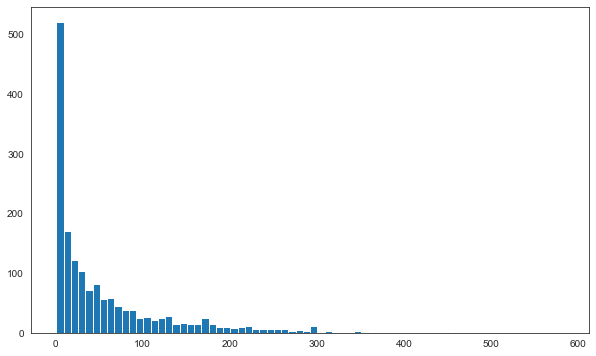

In [30]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'], bins=70)
plt.show()

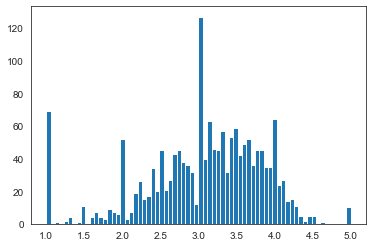

In [31]:
plt.hist(ratings['rating'], bins=70)
plt.show()   # in this we can see very less people have rated movie with 5

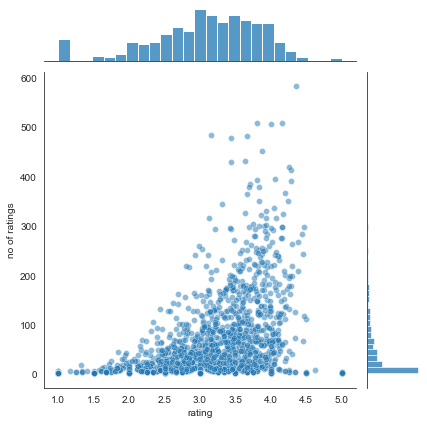

In [32]:
sns.jointplot(x='rating',y='no of ratings', data=ratings,alpha=0.5)

# Creating Movie Recommendation System

In [33]:
# lets create a matrix in which user_id is on one axis, and the movie_title on another axis. 
# and each cell will contain ratings by that particular user to that movie
moviemat = df.pivot_table(index="user_id", columns="title", values="rating")

In [34]:
moviemat  # this will have moive ratings as value, moive name as column name, and user_id as id of person, if NaN is ther means that person has not rated that movie


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ratings.sort_values('no of ratings', ascending=False).head()

,rating,no of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [36]:
# lets see movie Star Wars (1977) how much ratings it have got form various person
star_wars_user_ratings = moviemat['Star Wars (1977)']

In [37]:
star_wars_user_ratings 
# now we can co-relate this star_wars_user_ratings(series not data frame is this) with moviemat data matrix 

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [38]:
moviemat.corrwith(star_wars_user_ratings)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [39]:
similar_to_starwars = moviemat.corrwith(star_wars_user_ratings)

In [56]:
corr_star_wars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [57]:
corr_star_wars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [58]:
corr_star_wars.dropna(inplace=True)  # this is to remove the Nan values 

In [59]:
corr_star_wars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [61]:
corr_star_wars.sort_values('Correlation',ascending=False).head(10)  
# 1 means those are highly correlarted, -1 means it is -ve correlated

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


###### we will only suggest those moives which are rated by more than or equal to 100, so we have to do some filteration

In [63]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [66]:
corr_star_wars = corr_star_wars.join(ratings['no of ratings'])  # we are joining two data, so that we can have correleation and no of ratings comes to same

In [67]:
corr_star_wars.head(10)

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [69]:
corr_star_wars[corr_star_wars['no of ratings']>100] # taking those data which has been rated by more than 100 people

,Correlation,no of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
...,...,...
Willy Wonka and the Chocolate Factory (1971),0.221902,326
"Wizard of Oz, The (1939)",0.266335,246
"Wrong Trousers, The (1993)",0.216204,118


In [71]:
corr_star_wars[corr_star_wars['no of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


 # Prediction Function

In [84]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['no of ratings'])
    predictions = corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation', ascending=False)
    
    return predictions

In [85]:
predictions = predict_movies("Titanic (1997)")

In [88]:
predictions.head()  # this will print the top movie which has high correlation with "Titanic (1997)"

,Correlation,no of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


###### you can also try on another moive, there are also other data set for recommendation system as well, such as music recommendation or book recommendation 